THE TITANIC DATASET

We'll be trying to predict a classification- survival or deceased.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analysis

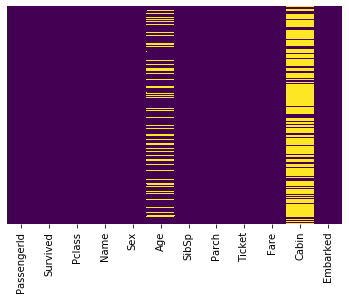

In [6]:
#a lot of time, theyll be missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#every yellow dash stands for a missing data, 

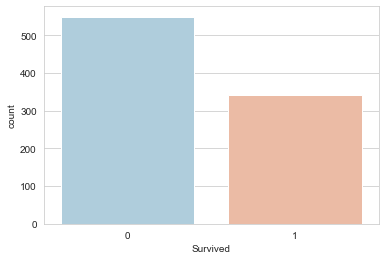

In [9]:
# a plot of those that survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

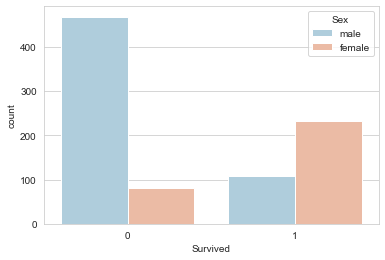

In [10]:
# a plot of those that survived showing their sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

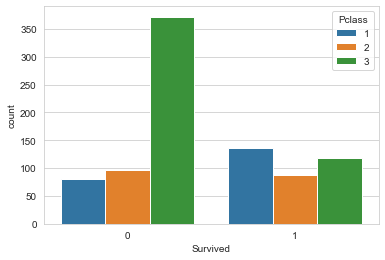

In [13]:
#plot of survival rate based on passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

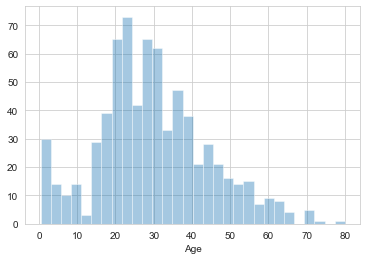

In [14]:
#age of folks on the titanic
sns.distplot(train['Age'].dropna(),kde= False,bins=30)

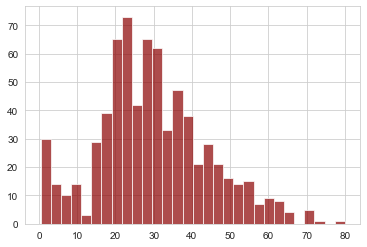

In [15]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

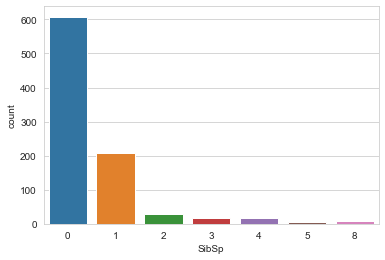

In [16]:
#number of siblings on board
sns.countplot(x='SibSp',data=train)

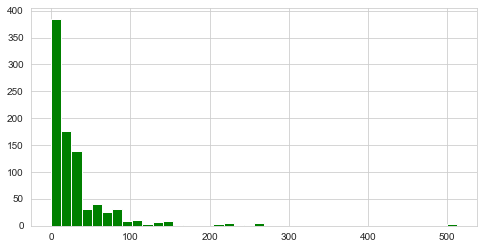

In [17]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

Cufflinks for plots

In [18]:
import cufflinks as cf
cf.go_offline()

In [19]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. 
One way to do this is by filling in the mean age of all the passengers (imputation). 
However we can be smarter about this and check the average age by passenger class. For example:

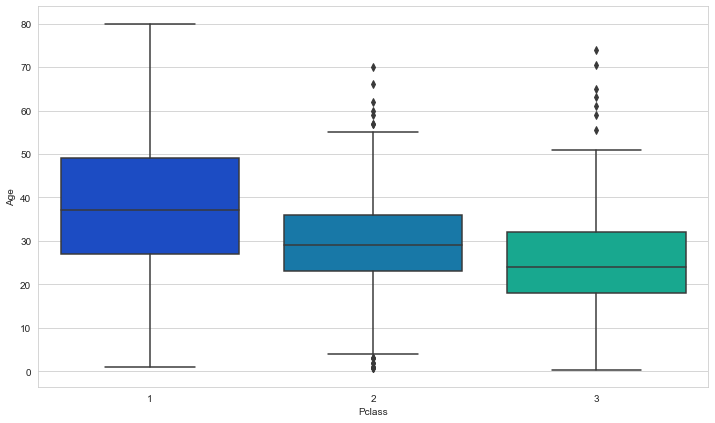

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [33]:
#function to help fill the null values in the age column

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [34]:
train['Age']= train[['Age','Pclass']].apply(impute_age, axis =1)

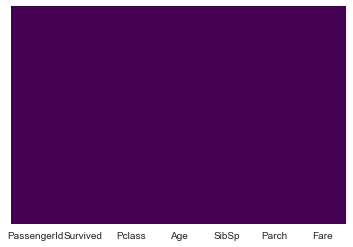

In [42]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
# time to drop the cabin column
train.drop('Cabin', axis = 1, inplace = True)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [43]:
#to drop any missing value at all
train.dropna(inplace=True)

Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas!
Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [40]:
#using dummies , we can feed in data to our algo in 0 or 1, and since we can feed in  both male and female for the sex column, we'll feed in one, either male, so that the algo knows the opposite is automatically female
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [41]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [45]:
train = pd.concat([train,sex,embark],axis = 1)

In [46]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24.0,1,0,7.2500,1,0,1
1,2,1,1,37.0,1,0,71.2833,0,0,0


In [48]:
train.drop('PassengerId', axis = 1,inplace = True )

In [50]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24.0,1,0,7.2500,1,0,1
1,1,1,37.0,1,0,71.2833,0,0,0


In [56]:
from sklearn.model_selection import train_test_split

In [60]:
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q','S']]
y = train['Survived']

In [61]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logmodel = LogisticRegression()

In [64]:
logmodel.fit(X_train,y_train)

C:\Users\Chukwuma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
predictions = logmodel.predict(X_test)

In [66]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 36,  68]], dtype=int64)